In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import logging
logging.basicConfig(level=logging.INFO, format=' %(asctime)s - %(levelname)s - %(message)s')

import levy_stable_jax as lsj
import levy_stable_jax.estimation
import jax.numpy as jnp
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import levy_stable as sp_levy_stable
from scipy.stats import lognorm as sp_lognorm
import jax

sp_levy_stable.parameterization = "S0"


In [3]:
# (alpha, beta) = (1.5944529757446195, 0.9140602576756717)
# (alpha, beta) = (1.9999989999999999, 0.9999890000100001)
# (alpha, beta) = (1.2, -0.9999) #9999890000100001)
(alpha, beta) = (1.2, 0.9)
# alpha = 1.9193154521329552
# beta = 0.8991364476436018
loc, scale = 1.0, 2.0

 2024-05-18 21:08:42,630 - INFO - Unable to initialize backend 'cuda': 
 2024-05-18 21:08:42,635 - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
 2024-05-18 21:08:42,664 - INFO - Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


interp_linear: nan in points_: False nan in grid: False inf in grid: True all lower: True >=0: True
interp_linear [[ 77.61       8.77778   95.      ]
 [ 78.01202    8.77778   95.      ]
 [ 78.41404    8.77778   95.      ]
 [ 78.81606    8.77778   95.      ]
 [ 79.21809    8.77778   95.      ]
 [ 79.6201     8.77778   95.      ]
 [ 80.02212    8.77778   95.      ]
 [ 80.42414    8.77778   95.      ]
 [ 80.826164   8.77778   95.      ]
 [ 81.22819    8.77778   95.      ]
 [ 81.6302     8.77778   95.      ]
 [ 82.03222    8.77778   95.      ]
 [ 82.434235   8.77778   95.      ]
 [ 82.836266   8.77778   95.      ]
 [ 83.23829    8.77778   95.      ]
 [ 83.640305   8.77778   95.      ]
 [ 84.04232    8.77778   95.      ]
 [ 84.44434    8.77778   95.      ]
 [ 84.84637    8.77778   95.      ]
 [ 85.24838    8.77778   95.      ]
 [ 85.650406   8.77778   95.      ]
 [ 86.05242    8.77778   95.      ]
 [ 86.454445   8.77778   95.      ]
 [ 86.85647    8.77778   95.      ]
 [ 87.258484   8.77778

<Axes: >

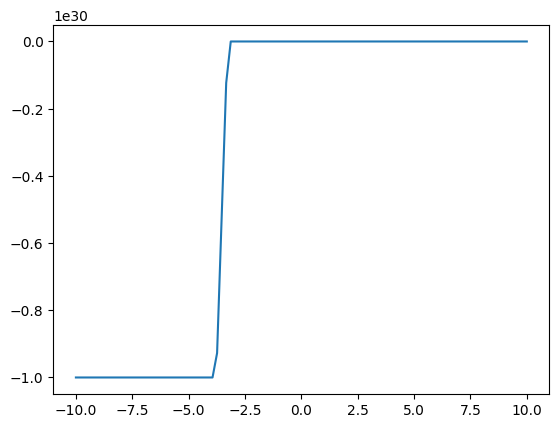

In [4]:
xs = jnp.linspace(-10, 10, 100)
sns.lineplot(x=xs,
             y=lsj.logpdf(xs, alpha,beta,loc, scale, "N0")-sp_levy_stable.logpdf(xs,alpha=alpha, beta=beta))
# sns.lineplot(x=xs,
#              y=sp_levy_stable.logpdf(xs,alpha=alpha, beta=beta))

interp_linear: nan in points_: False nan in grid: False inf in grid: True all lower: True >=0: True
interp_linear [[ 77.61       8.77778   95.      ]
 [ 78.01202    8.77778   95.      ]
 [ 78.41404    8.77778   95.      ]
 [ 78.81606    8.77778   95.      ]
 [ 79.21809    8.77778   95.      ]
 [ 79.6201     8.77778   95.      ]
 [ 80.02212    8.77778   95.      ]
 [ 80.42414    8.77778   95.      ]
 [ 80.826164   8.77778   95.      ]
 [ 81.22819    8.77778   95.      ]
 [ 81.6302     8.77778   95.      ]
 [ 82.03222    8.77778   95.      ]
 [ 82.434235   8.77778   95.      ]
 [ 82.836266   8.77778   95.      ]
 [ 83.23829    8.77778   95.      ]
 [ 83.640305   8.77778   95.      ]
 [ 84.04232    8.77778   95.      ]
 [ 84.44434    8.77778   95.      ]
 [ 84.84637    8.77778   95.      ]
 [ 85.24838    8.77778   95.      ]
 [ 85.650406   8.77778   95.      ]
 [ 86.05242    8.77778   95.      ]
 [ 86.454445   8.77778   95.      ]
 [ 86.85647    8.77778   95.      ]
 [ 87.258484   8.77778

<Axes: >

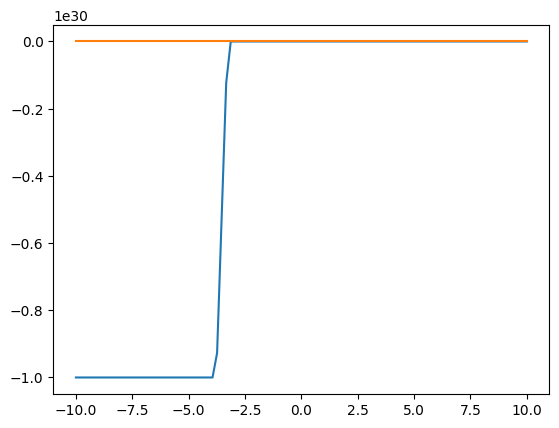

In [5]:
xs = jnp.linspace(-10, 10, 100)
sns.lineplot(x=xs,
             y=lsj.logpdf(xs, alpha,beta,loc=loc,scale=scale))
sns.lineplot(x=xs,
             y=sp_levy_stable.logpdf(xs,alpha=alpha, beta=beta,loc=loc,scale=scale))

# Check CDF

interp_linear: nan in points_: False nan in grid: False inf in grid: True all lower: True >=0: True
interp_linear [[ 77.61       8.77778   95.      ]
 [ 78.01202    8.77778   95.      ]
 [ 78.41404    8.77778   95.      ]
 [ 78.81606    8.77778   95.      ]
 [ 79.21809    8.77778   95.      ]
 [ 79.6201     8.77778   95.      ]
 [ 80.02212    8.77778   95.      ]
 [ 80.42414    8.77778   95.      ]
 [ 80.826164   8.77778   95.      ]
 [ 81.22819    8.77778   95.      ]
 [ 81.6302     8.77778   95.      ]
 [ 82.03222    8.77778   95.      ]
 [ 82.434235   8.77778   95.      ]
 [ 82.836266   8.77778   95.      ]
 [ 83.23829    8.77778   95.      ]
 [ 83.640305   8.77778   95.      ]
 [ 84.04232    8.77778   95.      ]
 [ 84.44434    8.77778   95.      ]
 [ 84.84637    8.77778   95.      ]
 [ 85.24838    8.77778   95.      ]
 [ 85.650406   8.77778   95.      ]
 [ 86.05242    8.77778   95.      ]
 [ 86.454445   8.77778   95.      ]
 [ 86.85647    8.77778   95.      ]
 [ 87.258484   8.77778

<Axes: >

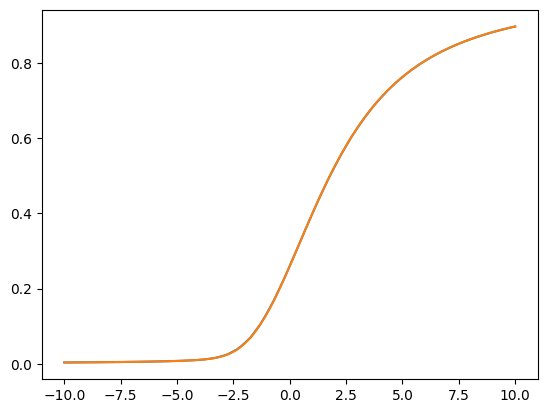

In [6]:
ys1 = lsj.cdf(xs, alpha, beta, loc, scale, "N0")
sns.lineplot(x=xs, y=ys1)
sns.lineplot(x=xs, y=sp_levy_stable.cdf(xs, alpha=alpha,beta=beta,loc=loc, scale=scale))

<Axes: >

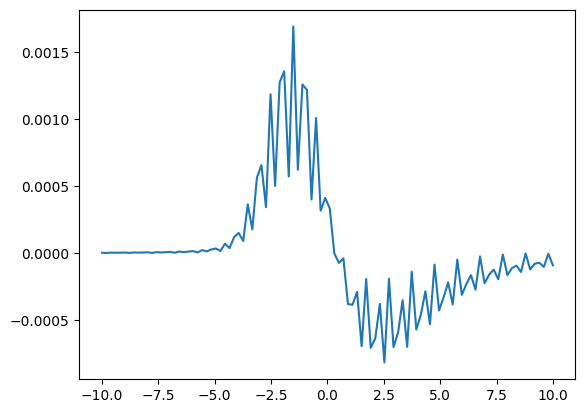

In [7]:
sns.lineplot(x=xs, y=ys1-sp_levy_stable.cdf(xs, alpha=alpha,beta=beta,loc=loc, scale=scale))

# Test fitting

In [11]:
from scipy.stats import lognorm as sp_lognorm

interp_linear: nan in points_: False nan in grid: False inf in grid: True all lower: True >=0: True
interp_linear [[ 86.204956  70.527565 100.      ]
 [ 86.730515  70.527565 100.      ]
 [ 87.25607   70.527565 100.      ]
 [ 87.781624  70.527565 100.      ]
 [ 88.30718   70.527565 100.      ]
 [ 88.83274   70.527565 100.      ]
 [ 89.3583    70.527565 100.      ]
 [ 89.88386   70.527565 100.      ]
 [ 90.40942   70.527565 100.      ]
 [ 90.93497   70.527565 100.      ]
 [ 91.460526  70.527565 100.      ]
 [ 91.986084  70.527565 100.      ]
 [ 92.51164   70.527565 100.      ]
 [ 93.03721   70.527565 100.      ]
 [ 93.56276   70.527565 100.      ]
 [ 94.08831   70.527565 100.      ]
 [ 94.61388   70.527565 100.      ]
 [ 95.139435  70.527565 100.      ]
 [ 95.66499   70.527565 100.      ]
 [ 96.19055   70.527565 100.      ]
 [ 96.71611   70.527565 100.      ]
 [ 97.24167   70.527565 100.      ]
 [ 97.76722   70.527565 100.      ]
 [ 98.29278   70.527565 100.      ]
 [ 98.81834   70.52756

<Axes: >

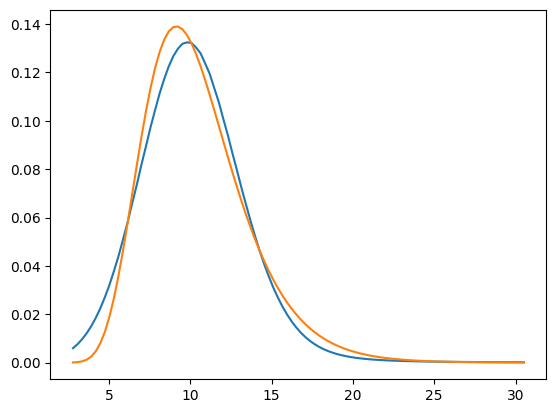

In [96]:
(s,scale_) = (0.3,10)
ppf_thresh = 1e-5
ll = sp_lognorm.ppf([0.05,0.25,0.5,0.75,0.95], scale=scale_, s=s)
ll
(x_low, x_high) = sp_lognorm.ppf([ppf_thresh, 1-ppf_thresh*10], scale=scale_, s=s)
xs = np.linspace(x_low, x_high,100)
(alpha, beta, loc, scale) = levy_stable_jax.estimation.fit_quantiles(None,param="N1",percentiles=ll)
sns.lineplot(
    x=xs,
    y=lsj.pdf(xs,alpha,beta,loc,scale,param="N1"))
sns.lineplot(
    x=xs,
    y=sp_lognorm.pdf(xs,scale=scale_,s=s))


In [97]:
alpha,beta,loc,scale

(Array(1.9034786, dtype=float32),
 Array(1., dtype=float32),
 Array(10.193095, dtype=float32),
 Array(2.1215882, dtype=float32))

In [86]:
ll,x_low,x_high

(array([ 1.93040817,  5.09416284, 10.        , 19.63031084, 51.80251602]),
 0.14053401766126727,
 711.5714875606429)

In [7]:
lpdf = levy_stable_jax._cache.jax_read_from_cache("logpdf")
lpdf.shape

NameError: name 'levy_stable_jax' is not defined

In [ ]:
locs = jnp.asarray([1.0, 2.0])
scales = jnp.asarray(1.0)
A = jnp.asarray([[1,2],[3,4],[5,6]])
b = jnp.asarray([[2,2,2]]).T

A * locs + b

In [ ]:
locs = jnp.asarray([1.0, 1.1])
scales = 2.0
A = jnp.asarray([[1,2],[3,4],[5,6]])
b = jnp.asarray([[2,2,2]]).T
(beta1, loc1, scale1) = lsj.shift_scale(2.0, 0.0,locs, scales, A,b,"N1")
(beta1, loc1, scale1)

In [ ]:
lsj.sum(2.0, beta1, loc1, scale1, param="N1", axis=0)

In [ ]:
raise

In [ ]:
from levy_stable_jax.distribution import TAB_X_CUTOFF, NUM_X_POINTS, ALPHA_MIN, ALPHA_MAX, NUM_ALPHA_POINTS, BETA_MIN, BETA_MAX, NUM_BETA_POINTS
xs = np.linspace(-TAB_X_CUTOFF, TAB_X_CUTOFF, NUM_X_POINTS)
alphas = np.linspace(ALPHA_MIN, ALPHA_MAX, NUM_ALPHA_POINTS)
betas = np.linspace(BETA_MIN, BETA_MAX, NUM_BETA_POINTS)
dx = 2 * TAB_X_CUTOFF / NUM_X_POINTS
NUM_BETA_POINTS

In [ ]:
alpha_idx = 40
beta_idx = 43
ys = np.array(lpdf[:,alpha_idx,beta_idx])
alpha = alphas[alpha_idx]
beta = betas[beta_idx]
print("alpha",alpha,"beta",beta)
with levy_stable_jax._utils.set_stable("N0"):
    ys0 = sp_levy_stable.logpdf(xs, alpha=alpha, beta=beta)
sns.lineplot(x=xs, y=ys0)
sns.lineplot(x=xs, y=ys)


In [ ]:
beta

In [ ]:
sns.scatterplot(x=xs, y=np.gradient(lpdf[:,alpha_idx,beta_idx]))

In [ ]:
sns.scatterplot(x=xs, y=ys)

# Check random parameters

In [ ]:
prng = jax.random.PRNGKey(1)
ys = lsj.rvs(alpha=1.8, beta=-1.0,loc=10.0, scale=0.5,param="N1",prng=prng,shape=(1000,))

In [ ]:
sns.histplot(ys)

In [ ]:
import levy_stable_jax.estimation

In [ ]:
lsj.estimation.fit_ll(ys, alpha=1.8, beta=None, param="N1")